<a href="https://colab.research.google.com/github/Leonild/DS_mAIstros/blob/main/ShaloonAnn_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Shallon ANN (Logistic Regression) for Churn predict

The code is available on: https://github.com/Leonild/DS_mAIstros/blob/main/ShaloonAnn_LogisticRegression.ipynb

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

cmap_bold = ListedColormap(["#FF0000", "#0000FF"])

cmap_light = ListedColormap(["#FFBBBB", "#BBBBFF"])

sns.set(color_codes=True)
#reading directly from the cloud 
url = 'https://drive.google.com/file/d/1caSSco2Hy5qQKMPDyFaa0JsWjKi137u6/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
data = pd.read_csv(path)
#No duplicate data
print(data.shape)

data=data.drop_duplicates()

print(data.shape)

data = data.rename(columns={"CustomerId": "EmployeeId", "CreditScore": "ProjectScore", "Tenure": "PreviousExperience",
                     "NumOfProducts": "NumOfProjects", "HasCrCard": "FastMaketing", "IsActiveMember": "OnProject"})

print(data.head())

(10000, 14)
(10000, 14)
   RowNumber  EmployeeId   Surname  ProjectScore Geography  Gender  Age  \
0          1    15634602  Hargrave           619    France  Female   42   
1          2    15647311      Hill           608     Spain  Female   41   
2          3    15619304      Onio           502    France  Female   42   
3          4    15701354      Boni           699    France  Female   39   
4          5    15737888  Mitchell           850     Spain  Female   43   

   PreviousExperience    Balance  NumOfProjects  FastMaketing  OnProject  \
0                   2       0.00              1             1          1   
1                   1   83807.86              1             0          1   
2                   8  159660.80              3             1          0   
3                   1       0.00              2             0          0   
4                   2  125510.82              1             1          1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        1

## Finding correlation

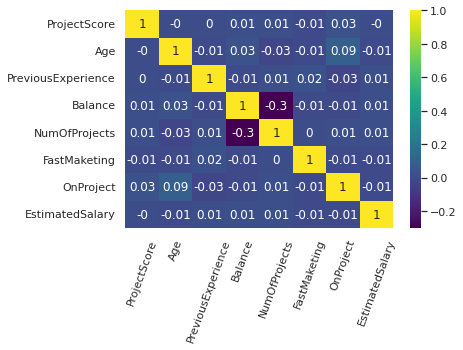

In [19]:
c= data[['ProjectScore', 'Geography', 'Gender', 'Age', 'PreviousExperience', 'Balance', 'NumOfProjects', 'FastMaketing',
        'OnProject', 'EstimatedSalary']].corr().round(2)
ax = sns.heatmap(c, cmap='viridis', annot=True)
ax.tick_params(axis='x', rotation=70)

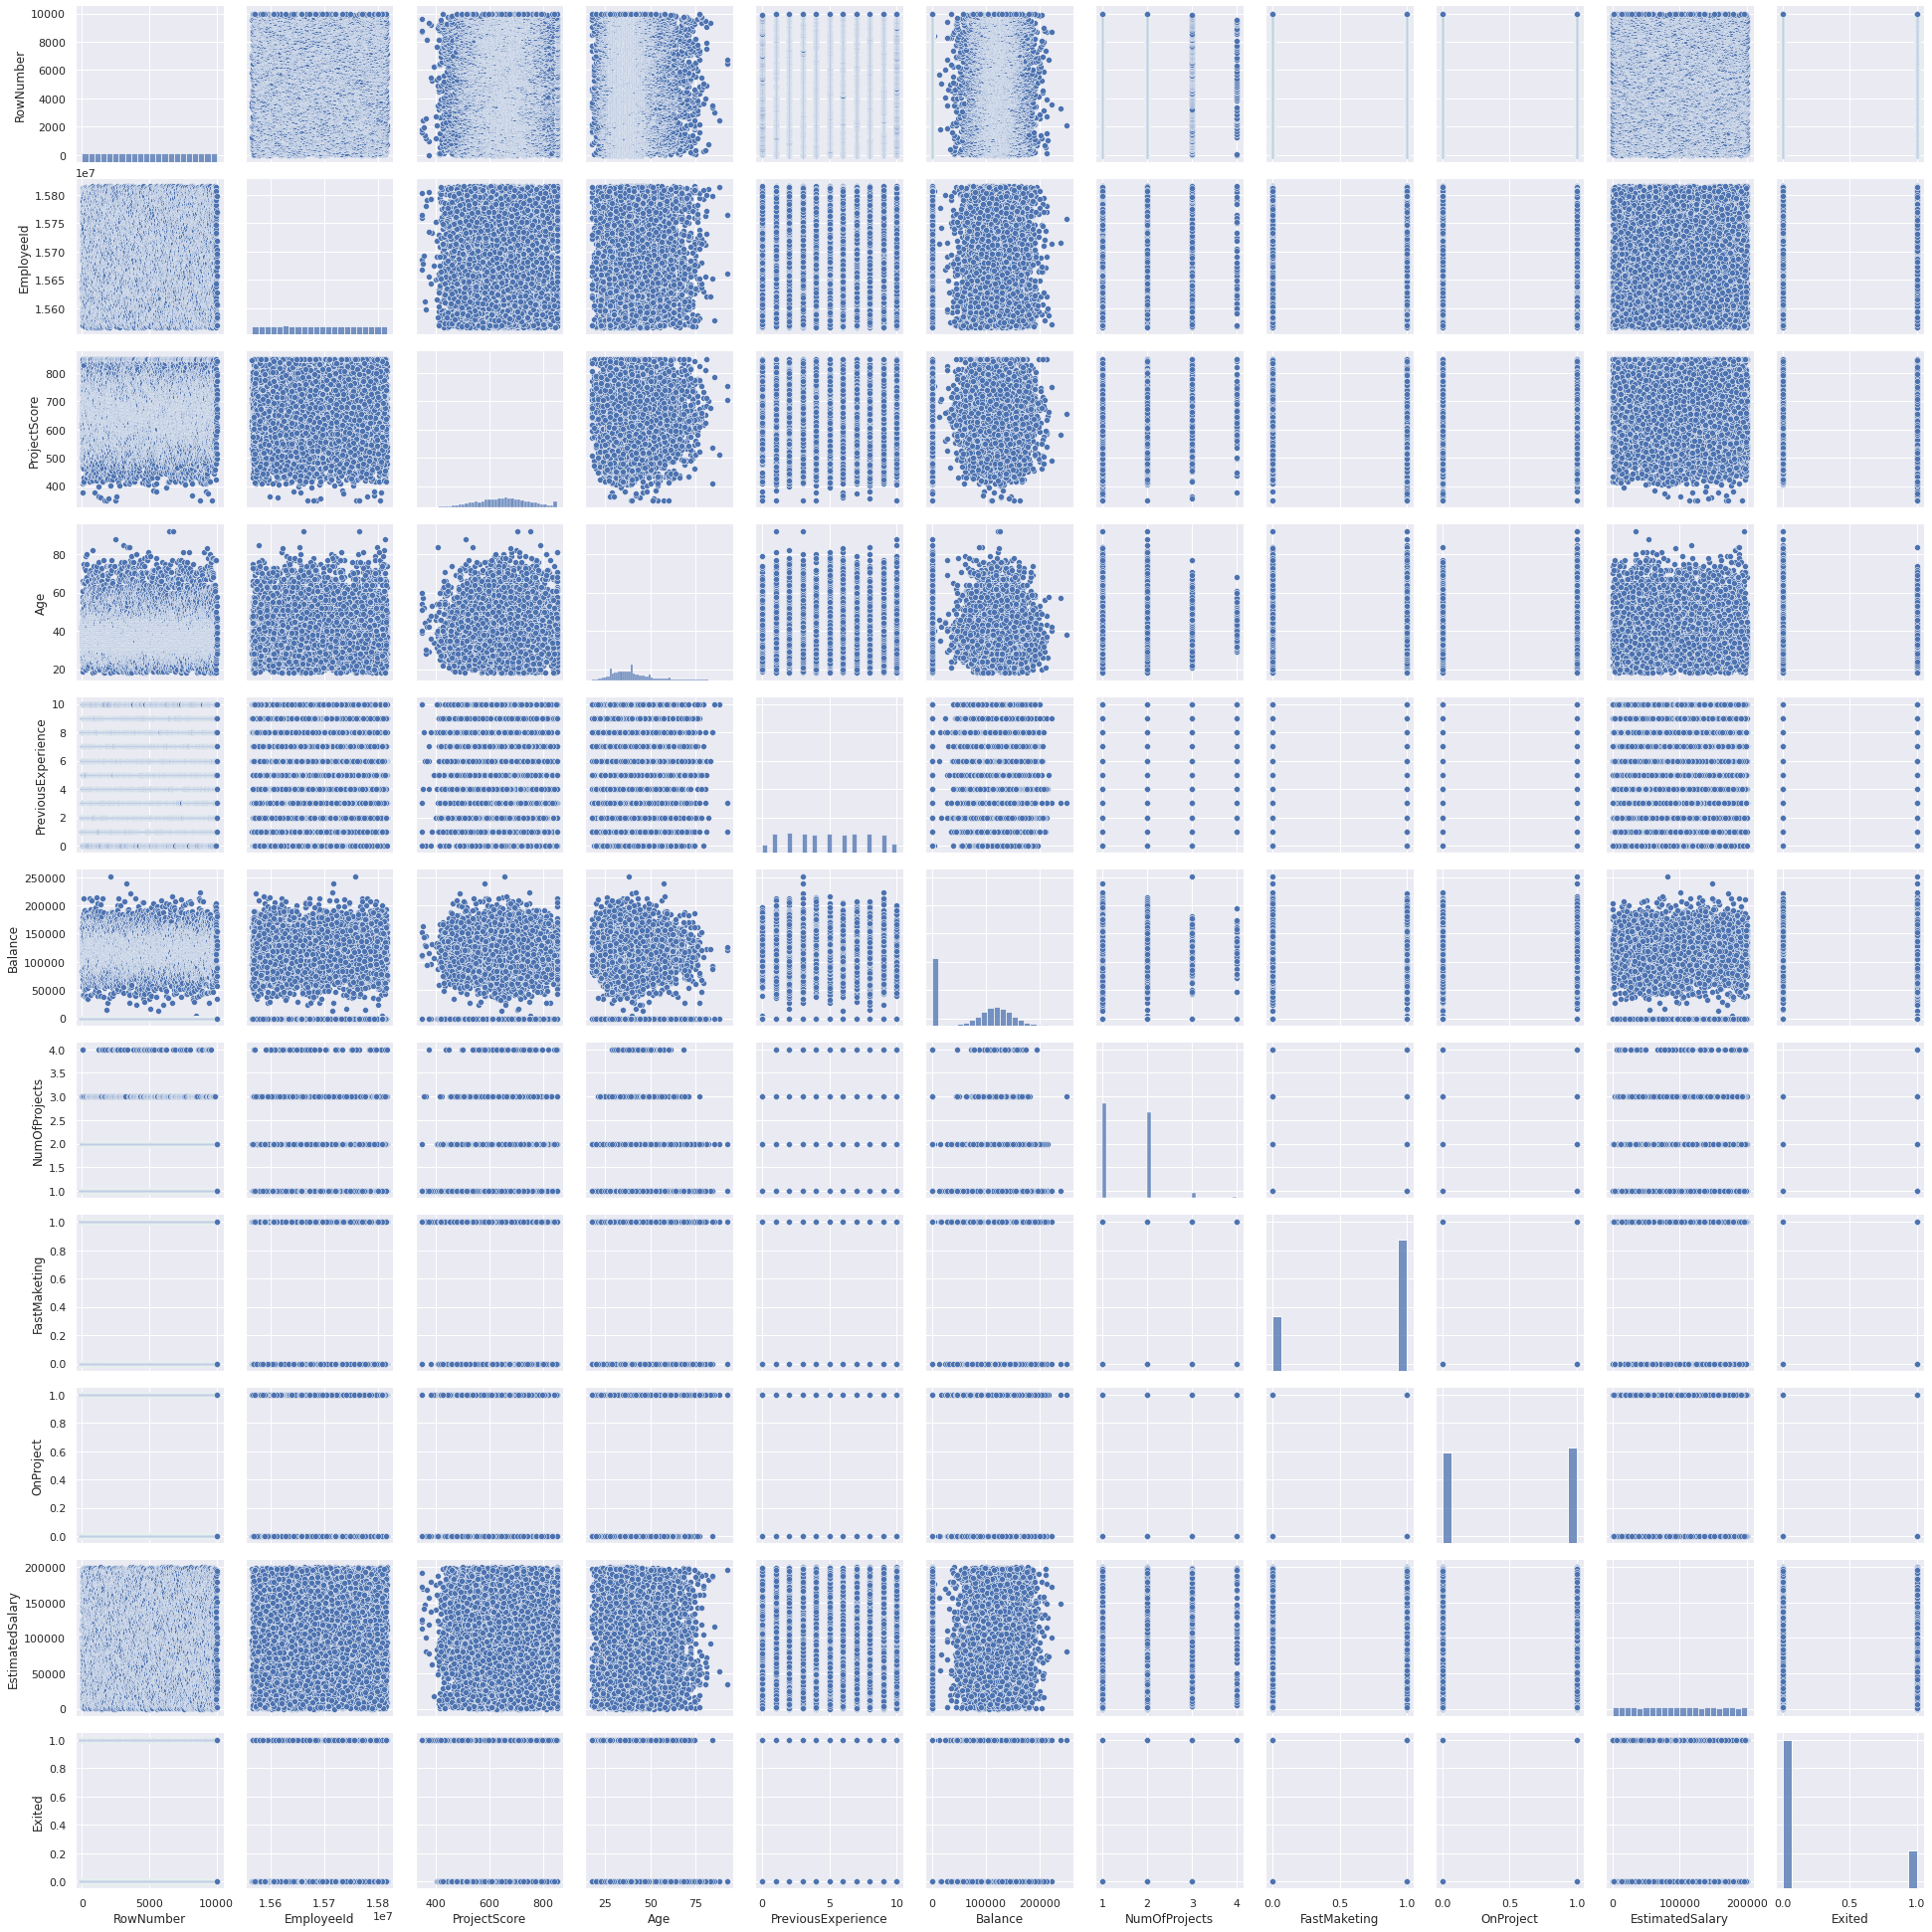

In [20]:
sns.pairplot(data)

In [ ]:
gender_mapping = {'Male': 0, 'Female': 1}
geography_mapping = {'France': 0, 'Spain': 1, 'Germany': 2}
new_data = data.replace({'Gender': gender_mapping, 'Geography': geography_mapping})
print(new_data.loc[(new_data['Gender']==0) & new_data['Exited']==1])

In [ ]:
#geom_boxplot(aes(x=Churn,y=TotalCharges,fill=Churn))
#['ProjectScore', 'Geography', 'Gender', 'Age', 'PreviousExperience', 'Balance', 'NumOfProjects', 'FastMaketing',
#        'OnProject', 'EstimatedSalary']

sns.boxplot(data=new_data, x="Exited", y="Age")#, hue="Geography")
#sns.boxplot(x=data['Exited'], y=data['Gender'])

<Axes: xlabel='Exited'>

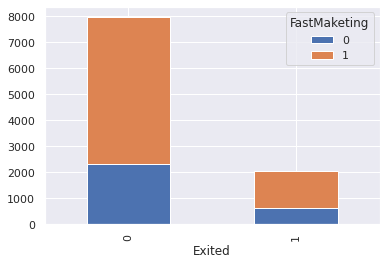

In [23]:
# plot data in stack manner of bar type
#df = data[['Exited', 'Gender']]
#pd.crosstab(df['Exited'],df['FastMaketing']).plot(kind="bar",stacked=True)
df = data[['Exited', 'FastMaketing']]
pd.crosstab(df['Exited'],df['FastMaketing']).plot(kind="bar",stacked=True)

Looking at the label, we should apply sigmoid function. Beause we have only two lable

In [24]:
set(data['Exited'])

{0, 1}

# Metrics
Functions to calculate recall, precision, and F1-score

In [25]:
def get_metrics(y, y_hat):
    tp, tn, fp, fn = calculate_confusion_matrix(y,y_hat)
    precision, recall, f1_score = calculate_metrics(tp, tn, fp, fn)
    return precision, recall, f1_score

def calculate_confusion_matrix(actual_labels, predicted_labels):
    tp = 0
    tn = 0
    fp = 0
    fn = 0

    for i in range(len(actual_labels)):
        if actual_labels[i] == 1 and predicted_labels[i] == 1:
            tp += 1
        elif actual_labels[i] == 0 and predicted_labels[i] == 0:
            tn += 1
        elif actual_labels[i] == 0 and predicted_labels[i] == 1:
            fp += 1
        else:
            fn += 1

    return tp, tn, fp, fn

def calculate_metrics(tp, tn, fp, fn):
    # calculate precision
    precision = tp / (tp + fp)
    
    # calculate recall
    recall = tp / (tp + fn)
    
    # calculate F1-score
    f1_score = 2 * ((precision * recall) / (precision + recall))
    
    return precision, recall, f1_score

# Solution
Once we have a binary output, a single logistic regression should be enough

## Simple Logistic regression

In [26]:
class SLogisticRegression():

  def __init__(self, thresh=0.5):
    self.thresh = thresh
    self.b = None
    self.w = None

  def fit(self, X, y, eta=1e-3, epochs=1e3, show_curve=False):
    epochs = int(epochs)
    N, D = X.shape
    # Initialize the weights and biases
    self.w = np.random.randn(D)
    self.b = np.random.randn(1)
    #empty array for losses
    J = np.zeros(epochs)
    #SDG Optimization
    for epoch in range(epochs):
      p_hat = self.__forward__(X)
      J[epoch] = binary_cross_entropy(y, p_hat)
      #wights and biases update rules
      self.w -= eta*(1 / N) * X.T @ (p_hat - y)
      self.b -= eta*(1 / N) * np.sum(p_hat - y)

    if show_curve:
      plt.figure()
      plt.plot(J)
      plt.xlabel("epochs")
      plt.ylabel("$\mathcal{J}$")
      plt.title("Training curve")

  def __forward__(self, X):
    return sigmoid(X @ self.w + self.b)

  def predict(self, X):
    return (self.__forward__(X)>=self.thresh).astype(np.int32)

def sigmoid(h):
  return 1 / (1 + np.exp(-h))

def binary_cross_entropy(y, p_hat):
  return -(1 / len(y)) * np.sum(y * np.log(p_hat) + (1 - y ) * np.log(1 - p_hat))

def accuracy(y, y_hat):
  return np.mean(y==y_hat)

### Standardizing the data

In [27]:
gender_mapping = {'Male': 0, 'Female': 1}
geography_mapping = {'France': 0, 'Spain': 1, 'Germany': 2}
new_data = data.replace({'Gender': gender_mapping, 'Geography': geography_mapping})

new_data = new_data.drop(['RowNumber', 'EmployeeId', 'Surname'],axis=1).sample(frac=1)
new_data = (new_data - new_data.mean()) / new_data.std()
new_data

,ProjectScore,Geography,Gender,Age,PreviousExperience,Balance,NumOfProjects,FastMaketing,OnProject,EstimatedSalary,Exited
1912,0.377340,1.505841,1.095933,-0.946032,-0.350186,0.039317,-0.911538,0.646059,-1.030619,0.383310,1.977066
7062,-0.553823,-0.902541,1.095933,0.198154,-0.350186,1.111002,0.807696,0.646059,0.970194,-0.830648,-0.505749
2270,-1.164252,-0.902541,1.095933,-0.087893,1.032856,0.196692,0.807696,-1.547691,-1.030619,-1.249582,1.977066
5053,-0.150319,1.505841,1.095933,-1.041381,-1.041708,0.621488,-0.911538,-1.547691,-1.030619,1.591668,-0.505749
1673,0.015221,1.505841,1.095933,-1.232078,-1.387468,0.888217,-0.911538,0.646059,0.970194,1.376784,-0.505749
...,...,...,...,...,...,...,...,...,...,...,...
2141,0.242839,-0.902541,-0.912374,-1.994869,0.687096,-1.225786,0.807696,0.646059,0.970194,-0.770940,1.977066
3338,0.387687,0.301650,1.095933,-1.422776,-0.695947,-1.225786,0.807696,0.646059,0.970194,0.036601,-0.505749
3989,0.160069,-0.902541,-0.912374,-0.850683,0.687096,0.533987,-0.911538,-1.547691,0.970194,1.104760,-0.505749
9558,-0.284820,0.301650,-0.912374,0.674898,-0.350186,-1.225786,-0.911538,0.646059,-1.030619,-1.643894,1.977066


### Testing solution

In [38]:
def main():
  # Standardizing the data
  gender_mapping = {'Male': 0, 'Female': 1}
  geography_mapping = {'France': 0, 'Spain': 1, 'Germany': 2}
  new_data = data.replace({'Gender': gender_mapping, 'Geography': geography_mapping})

  new_data = new_data.drop(['RowNumber', 'EmployeeId', 'Surname'],axis=1).sample(frac=1)
  new_data = (new_data - new_data.mean()) / new_data.std()

  X = new_data.to_numpy()

  X_test = X[int(len(X)*0.9):,:]

  X_train = X[:int(len(X)*0.9),:]

  print(X_train.shape)
  print(X_test.shape)

  y_train = np.array(list(map(lambda x: int(x), X_train[:, 10]))) # getting the class
  y_test = np.array(list(map(lambda x: int(x), X_test[:, 10]))) # getting the class

  X_train = X_train[:,:10] # getting all the data but last column
  X_test = X_test[:,:10] # getting all the data but last column

  print(X_train.shape)
  print(X_test.shape)

  log_reg = SLogisticRegression()
  log_reg.fit(X_train, y_train, epochs=1e5, eta=1e-2, show_curve=True)


  y_hat = log_reg.predict(X_test)

  print(f"Training Accuracy: {accuracy(y_test, y_hat):0.4f}")

  print(y_hat)

  precision, recall, f1_score = get_metrics(y_test, y_hat)

  print("Precision: ", precision)
  print("Recall: ", recall)
  print("F1: ", f1_score)


(9000, 11)
(1000, 11)
(9000, 10)
(1000, 10)
Training Accuracy: 0.8000
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0

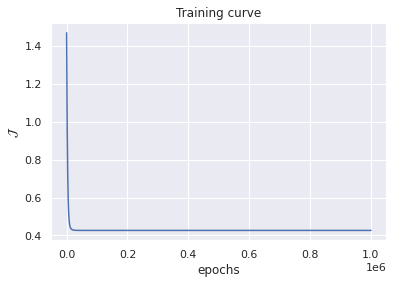

In [39]:
if __name__=="__main__":
  main()

## Shaloon ANN
Traying  another solution

In [40]:
class Shallow_ANN():

  def fit(self, X, Y, neurons=10, eta=1e-3, epochs=1e3, show_curve=False):
    epochs = int(epochs)
    Y = one_hot_encode(Y)
    N, D = X.shape
    K = Y.shape[1]
    # Weights and Bias initialization
    self.W = {l: np.random.randn(M[0], M[1]) for l, M in enumerate(zip([D,neurons], [neurons,K]), 1)}
    self.B = {l: np.random.randn(M) for l, M in enumerate([neurons, K], 1)}
    #define activations
    self.a = {1: np.tanh, 2: sigmoid}

    J = np.zeros(epochs)
    # GradientDescent
    for epoch in range(epochs):
      self.__forward__(X)
      J[epoch] = cross_entropy(Y, self.Z[2])

      #Weights and Biases update rules
      #for layer 2 (Output)
      self.W[2] -= eta * (1 / N) * self.Z[1].T @ (self.Z[2] - Y)
      self.B[2] -= eta * (1 / N) * (self.Z[2] - Y).sum(axis=0)
      # For layer 1
      self.W[1] -= eta * (1 / N) * X.T @ ((self.Z[2] - Y) @ self.W[2].T * (1 - self.Z[1]**2))
      self.B[1] -= eta * (1 / N) * ((self.Z[2] - Y) @ self.W[2].T * (1 - self.Z[1]**2)).sum(axis=0)

    if show_curve:
      plt.figure()
      plt.plot(J)
      plt.xlabel("epochs")
      plt.ylabel("$\mathcal{J}$") 
      plt.title("Training Curve")
      plt.show()

  def __forward__(self, X):
    self.Z = {0: X}

    for l in sorted(self.W.keys()):
      self.Z[l] = self.a[l](self.Z[l-1] @ self.W[l] + self.B[l])

  def predict(self, X):
    self.__forward__(X)
    return self.Z[2].argmax(axis=1)

#activation function
def linear(H):
  return H

#activation function ReLU, return linear for positive and zero for negative values
def ReLU(H):
  return H*(H>0)

def sigmoid(H):
  return 1 / (1 + np.exp(-H))

def softmax(H):
  eH = np.exp(H)
  return eH / eH.sum(axis=1, keepdims=True)

def one_hot_encode(y):
  N = len(y)
  K = len(set(y))
  Y = np.zeros((N, K))

  for i in range(N):
    Y[i, y[i]]=1

  return Y

def accuracy(y, y_hat):
  return np.mean(y==y_hat) 

def cross_entropy(Y, P_hat):
  return -np.sum(Y * np.log(P_hat))

### Testing solution

In [63]:
def main_ANN():
  # Standardizing the data
  gender_mapping = {'Male': 0, 'Female': 1}
  geography_mapping = {'France': 0, 'Spain': 1, 'Germany': 2}
  new_data = data.replace({'Gender': gender_mapping, 'Geography': geography_mapping})

  new_data = new_data.drop(['RowNumber', 'EmployeeId', 'Surname'],axis=1).sample(frac=1)
  new_data = (new_data - new_data.mean()) / new_data.std()

  X = new_data.to_numpy()

  X_test = X[int(len(X)*0.9):,:]

  X_train = X[:int(len(X)*0.9),:]

  print(X_train.shape)
  print(X_test.shape)

  y_train = np.array(list(map(lambda x: int(x), X_train[:, 10]))) # getting the class
  y_test = np.array(list(map(lambda x: int(x), X_test[:, 10]))) # getting the class

  X_train = X_train[:,:10] # getting all the data but last column
  X_test = X_test[:,:10] # getting all the data but last column

  print(X_train.shape)
  print(X_test.shape)

  log_reg = Shallow_ANN()
  log_reg.fit(X_train, y_train, neurons=15, epochs=1e4, eta=1e-1, show_curve=True)

  print("---- Test ----")

  y_hat = log_reg.predict(X_test)

  print(f"Training Accuracy: {accuracy(y_test, y_hat):0.4f}")

  precision, recall, f1_score = get_metrics(y_test, y_hat)

  print("Precision: ", precision)
  print("Recall: ", recall)
  print("F1: ", f1_score)

  print("---- Train ----")

  y_hat = log_reg.predict(X_train)

  print(f"Training Accuracy: {accuracy(y_train, y_hat):0.4f}")

  precision, recall, f1_score = get_metrics(y_train, y_hat)

  print("Precision: ", precision)
  print("Recall: ", recall)
  print("F1: ", f1_score)


(9000, 11)
(1000, 11)
(9000, 10)
(1000, 10)


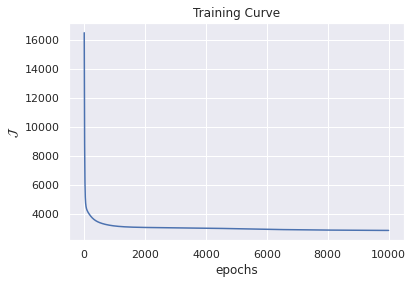

---- Test ----
Training Accuracy: 0.8480
Precision:  0.7391304347826086
Recall:  0.46788990825688076
F1:  0.5730337078651685
---- Train ----
Training Accuracy: 0.8691
Precision:  0.7736976942783945
Recall:  0.49807586586036284
F1:  0.6060200668896321


In [65]:
if __name__=="__main__":
  main_ANN()

## ANN with Back propagation

In [73]:
class ANN():
  def __init__(self, architecture, activations=None, mode=0):
    self.mode = mode
    self.architecture = architecture
    self.activations = activations
    self.L = len(architecture) + 1
  
  def fit(self, X, y, eta=1e-3, epochs=1e3, show_curve=False):
    epochs = int(epochs)
    if self.mode:
      Y=y
    else:
      Y = one_hot_encode(y)

    N, D = X.shape
    K = Y.shape[1]

    # Initialize Weights
    self.W = {l: np.random.randn(M[0], M[1]) for l, M in enumerate(zip(([D]+self.architecture), (self.architecture + [K])),1)}

    self.B = {l: np.random.randn(M) for l, M in enumerate(self.architecture + [K], 1)}

    if self.activations is None:
      self.a = {l: ReLU for l in range(1, self.L)}
    else: 
      self.a = {l: act for l, act in enumerate(self.activations, 1)}

    if self.mode:
      self.a[self.L] = sigmoid
    else:
      self.a[self.L] = softmax

    # container for loss calculation
    J = np.zeros(epochs)

    for epoch in range(epochs):
      self.__forward__(X)
      if self.mode:
        J[epoch] = OLS(Y, self.Z[self.L])
      else:
        J[epoch] = cross_entropy(Y,  self.Z[self.L])

      dH = (1/ N) * (self.Z[self.L] - Y)

      for l in sorted(self.W.keys(), reverse=True):
        dW = self.Z[l-1].T @ dH
        dB = dH.sum(axis=0)

        self.W[l] -= eta * dW
        self.B[l] -= eta * dB

        if l > 1:
          dZ = dH @ self.W[l].T
          dH = dZ * derivative(self.Z[l-1], self.a[l-1])

    if show_curve:
      plt.figure()
      plt.plot(J)
      plt.xlabel("epochs")
      plt.ylabel("$\mathcal{J}$") 
      plt.title("Training Curve")
      plt.show()

  def __forward__(self, X):
    self.Z = {0: X}
    for l in sorted(self.W.keys()):
      self.Z[l] = self.a[l](self.Z[l-1] @ self.W[l] + self.B[l])


  def predict(self, X):
    self.__forward__(X)
    if self.mode:
      return self.Z[self.L]
    else:
      return self.Z[self.L].argmax(axis=1)

def derivative(Z, a):
  if a == linear:
    return 1
  elif a==sigmoid:
    return Z * (1-Z)
  elif a == np.tanh:
    return 1 - Z*Z
  elif a==ReLU:
    return (Z>0).astype(int)
  else:
    ValueError("Unknow Activation Function")

#activation function
def linear(H):
  return H

#activation function ReLU, return linear for positive and zero for negative values
def ReLU(H):
  return H*(H>0)

def sigmoid(H):
  return 1 / (1 + np.exp(-H))

def softmax(H):
  eH = np.exp(H)
  return eH / eH.sum(axis=1, keepdims=True)

# Loss function

def one_hot_encode(y):
  N = len(y)
  K = len(set(y))
  Y = np.zeros((N, K))

  for i in range(N):
    Y[i, y[i]]=1

  return Y

def cross_entropy(Y, P_hat):
  return -np.sum(Y * np.log(P_hat))

def OLS(Y, Y_hat): # maybe I can use it as a metric as well
  return (1/(2*len(Y))) * np.sum((Y-Y_hat))
  

#Metrics

def accuracy(y, y_hat):
  return np.mean(y==y_hat) 

def R2(Y, Y_hat):
  return (1 - (np.sum((Y-Y_hat)**2) / np.sum((Y-np.mean(Y))**2)))

### Testing solution

In [93]:
def main_ANN_BP():
  # Standardizing the data
  gender_mapping = {'Male': 0, 'Female': 1}
  geography_mapping = {'France': 0, 'Spain': 1, 'Germany': 2}
  new_data = data.replace({'Gender': gender_mapping, 'Geography': geography_mapping})

  new_data = new_data.drop(['RowNumber', 'EmployeeId', 'Surname'],axis=1).sample(frac=1)
  new_data = (new_data - new_data.mean()) / new_data.std()

  X = new_data.to_numpy()

  X_test = X[int(len(X)*0.9):,:]

  X_train = X[:int(len(X)*0.9),:]

  print(X_train.shape)
  print(X_test.shape)

  y_train = np.array(list(map(lambda x: int(x), X_train[:, 10]))) # getting the class
  y_test = np.array(list(map(lambda x: int(x), X_test[:, 10]))) # getting the class

  X_train = X_train[:,:10] # getting all the data but last column
  X_test = X_test[:,:10] # getting all the data but last column

  print(X_train.shape)
  print(X_test.shape)

  log_reg = ANN(mode=0, architecture=[15,15,15], activations=[np.tanh]*3)
  log_reg.fit(X_train, y_train, epochs=1e4, eta=1e-1, show_curve=True)

  print("---- Test ----")

  y_hat = log_reg.predict(X_test)

  print(f"Training Accuracy: {accuracy(y_test, y_hat):0.4f}")

  precision, recall, f1_score = get_metrics(y_test, y_hat)

  print("Precision: ", precision)
  print("Recall: ", recall)
  print("F1: ", f1_score)

  print("---- Train ----")

  y_hat = log_reg.predict(X_train)

  print(f"Training Accuracy: {accuracy(y_train, y_hat):0.4f}")

  precision, recall, f1_score = get_metrics(y_train, y_hat)

  print("Precision: ", precision)
  print("Recall: ", recall)
  print("F1: ", f1_score)

(9000, 11)
(1000, 11)
(9000, 10)
(1000, 10)


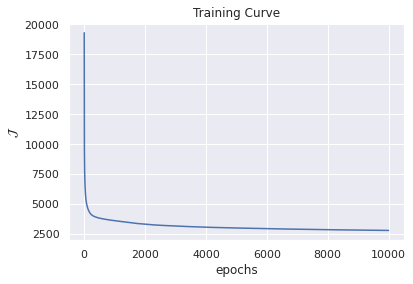

---- Test ----
Training Accuracy: 0.8250
Precision:  0.581081081081081
Recall:  0.4321608040201005
F1:  0.49567723342939474
---- Train ----
Training Accuracy: 0.8682
Precision:  0.7372634643377002
Recall:  0.5511425462459195
F1:  0.6307596513075966


In [94]:
if __name__=="__main__":
  main_ANN_BP()